<a href="https://colab.research.google.com/github/dilaraesmer/Data-Cleaning_1/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset shall be cleaned through the following processes:
1. Checking the number of columns
2. Changing misspelt column names to the correct names
3. Checking for missing values 
4. Checking for duplicate values
5. Checking for outliers


In [4]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns

In [5]:
# Read the file
df = pd.read_csv('diabetes_unclean.csv')

In [6]:
# Show first 5 rows in the dataset
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [7]:
# Checking for number of columns
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [12]:
# Rename the column "No_Pation" to "Patients_No"
df.rename(columns={"No_Pation": "Patients_No"}, inplace=True)

In [13]:
# Confirm the change
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [14]:
# To check for the missing values
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [15]:
mean_value = df["HbA1c"].mean()
mean_value

8.284155069582505

In [16]:
# Using the mean value to replace the missing records
df["HbA1c"].fillna(mean_value, inplace=True)

In [17]:
# To confirm the change
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          0
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [18]:
# Dropping the missing values of other columns
df1 = df.dropna()
df1.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64

In [19]:
# Check for information concerning the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1009 non-null   int64  
 1   Patients_No  1009 non-null   int64  
 2   Gender       1009 non-null   object 
 3   AGE          1008 non-null   float64
 4   Urea         1008 non-null   float64
 5   Cr           1007 non-null   float64
 6   HbA1c        1009 non-null   float64
 7   Chol         1007 non-null   float64
 8   TG           1007 non-null   float64
 9   HDL          1008 non-null   float64
 10  LDL          1007 non-null   float64
 11  VLDL         1008 non-null   float64
 12  BMI          1009 non-null   float64
 13  CLASS        1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [22]:
df1.groupby('CLASS')['CLASS'].agg("count")

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [23]:
# Check for the unique values in the column 'CLASS'
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [29]:
# To clean the column and replace the unique values
df1["CLASS"] = df1["CLASS"].str.replace("Y ", "Y")
df1["CLASS"] = df1["CLASS"].str.replace("N ", "N")

<ipython-input-29-4ed6e3ec8a70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"] = df1["CLASS"].str.replace("Y ", "Y")
<ipython-input-29-4ed6e3ec8a70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"] = df1["CLASS"].str.replace("N ", "N")


In [30]:
# To confirm the change
df1["CLASS"].unique()

array(['N', 'P', 'Y'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


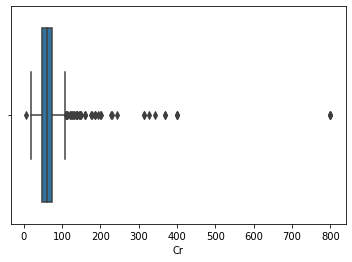

In [31]:
# Checking for outliers in the dataset
sns.boxplot(df1["Cr"])